In [374]:
#IMPORTO LE LIBRERIE 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.linear_model as skl_lm
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_classif
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import LeaveOneOut,  cross_val_score
from packages.utils import standard_OHE

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [375]:
#LETTURA FILE CSV capire come rendere globale questa url
url_AIDS_Classification = r'.\data\AIDS_Classification_5000.csv'
df = pd.read_csv(url_AIDS_Classification)
print(df.head())

   time  trt  age      wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  \
0   988    2   42  71.76131     0     0      0     100       0    1  ...   
1   413    3   30  72.67629     0     1      0     100       0    1  ...   
2  1119    0   37  73.75514     0     1      0      90       0    1  ...   
3   680    3   34  70.03769     0     0      0     100       0    0  ...   
4  1043    3   35  63.02845     0     0      0     100       0    1  ...   

   str2  strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  infected  
0     1      3        0      0       0   290    408  1870   1671         0  
1     0      1        0      0       0   506    446  1372    523         0  
2     1      3        0      0       0   499    542   609   1474         0  
3     0      1        0      1       0   313    478   780    987         0  
4     0      1        0      1       0   337    761   698   1735         0  

[5 rows x 23 columns]


In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      5000 non-null   int64  
 1   trt       5000 non-null   int64  
 2   age       5000 non-null   int64  
 3   wtkg      5000 non-null   float64
 4   hemo      5000 non-null   int64  
 5   homo      5000 non-null   int64  
 6   drugs     5000 non-null   int64  
 7   karnof    5000 non-null   int64  
 8   oprior    5000 non-null   int64  
 9   z30       5000 non-null   int64  
 10  preanti   5000 non-null   int64  
 11  race      5000 non-null   int64  
 12  gender    5000 non-null   int64  
 13  str2      5000 non-null   int64  
 14  strat     5000 non-null   int64  
 15  symptom   5000 non-null   int64  
 16  treat     5000 non-null   int64  
 17  offtrt    5000 non-null   int64  
 18  cd40      5000 non-null   int64  
 19  cd420     5000 non-null   int64  
 20  cd80      5000 non-null   int6

In [377]:
missing_values = df.isnull().sum()
print(missing_values)

# non ci sono dati mancanti

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64


In [378]:
duplicati = df.duplicated().sum()
print(duplicati)
# non ci sono duplicati
# df_cleaned = df.drop_duplicates()

0


In [379]:
df.dtypes

time          int64
trt           int64
age           int64
wtkg        float64
hemo          int64
homo          int64
drugs         int64
karnof        int64
oprior        int64
z30           int64
preanti       int64
race          int64
gender        int64
str2          int64
strat         int64
symptom       int64
treat         int64
offtrt        int64
cd40          int64
cd420         int64
cd80          int64
cd820         int64
infected      int64
dtype: object

In [380]:
#US6

#df.columns
#df.columns = ['nuovo_nome1', 'nuovo_nome2', 'nuovo_nome3', '...']
#deve avere lo stesso numero di colonne rispetto al dataset originale oppure utilizza rename() di pandas

In [381]:
df.head()
#df_dummies = pd.get_dummies(df, columns=['hemo', 'homo'], drop_first=True)
#va completata con le altre dummy, son già intere, non è necessario

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,988,2,42,71.76131,0,0,0,100,0,1,...,1,3,0,0,0,290,408,1870,1671,0
1,413,3,30,72.67629,0,1,0,100,0,1,...,0,1,0,0,0,506,446,1372,523,0
2,1119,0,37,73.75514,0,1,0,90,0,1,...,1,3,0,0,0,499,542,609,1474,0
3,680,3,34,70.03769,0,0,0,100,0,0,...,0,1,0,1,0,313,478,780,987,0
4,1043,3,35,63.02845,0,0,0,100,0,1,...,0,1,0,1,0,337,761,698,1735,0


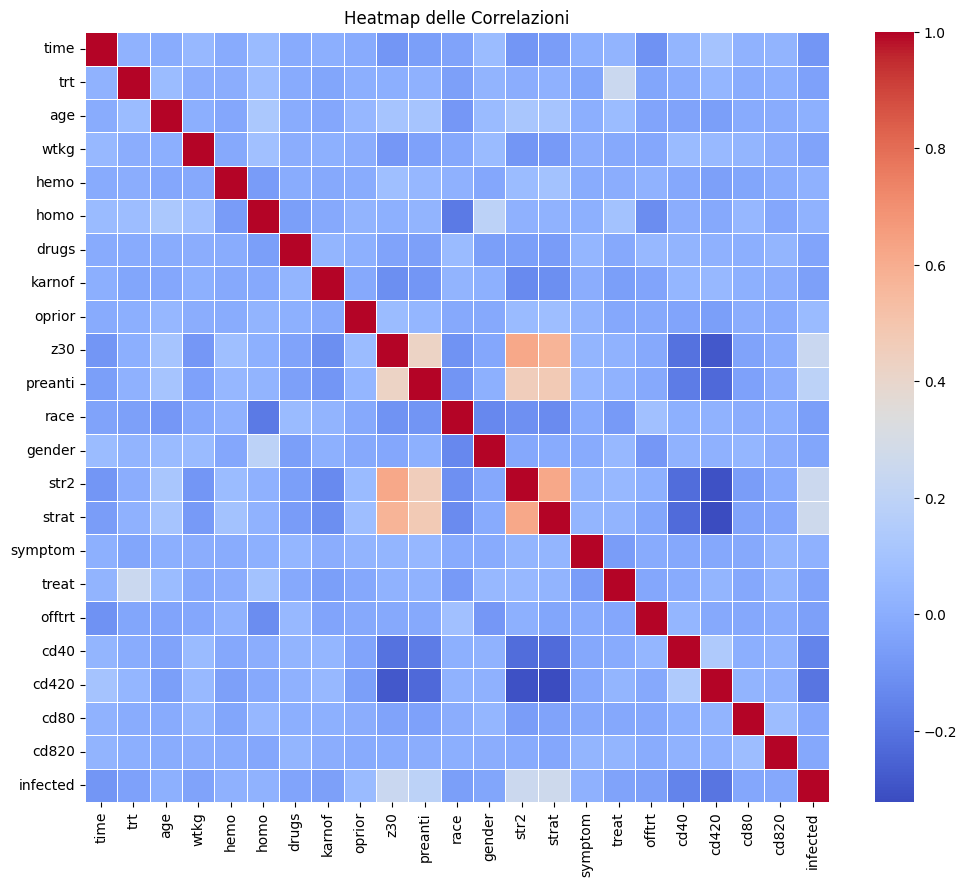

In [382]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap delle Correlazioni') 
plt.show()


In [383]:
X = df.drop(columns='infected')
y = df.infected

In [384]:
# Numerical columns
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns.to_list())

['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof', 'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820']


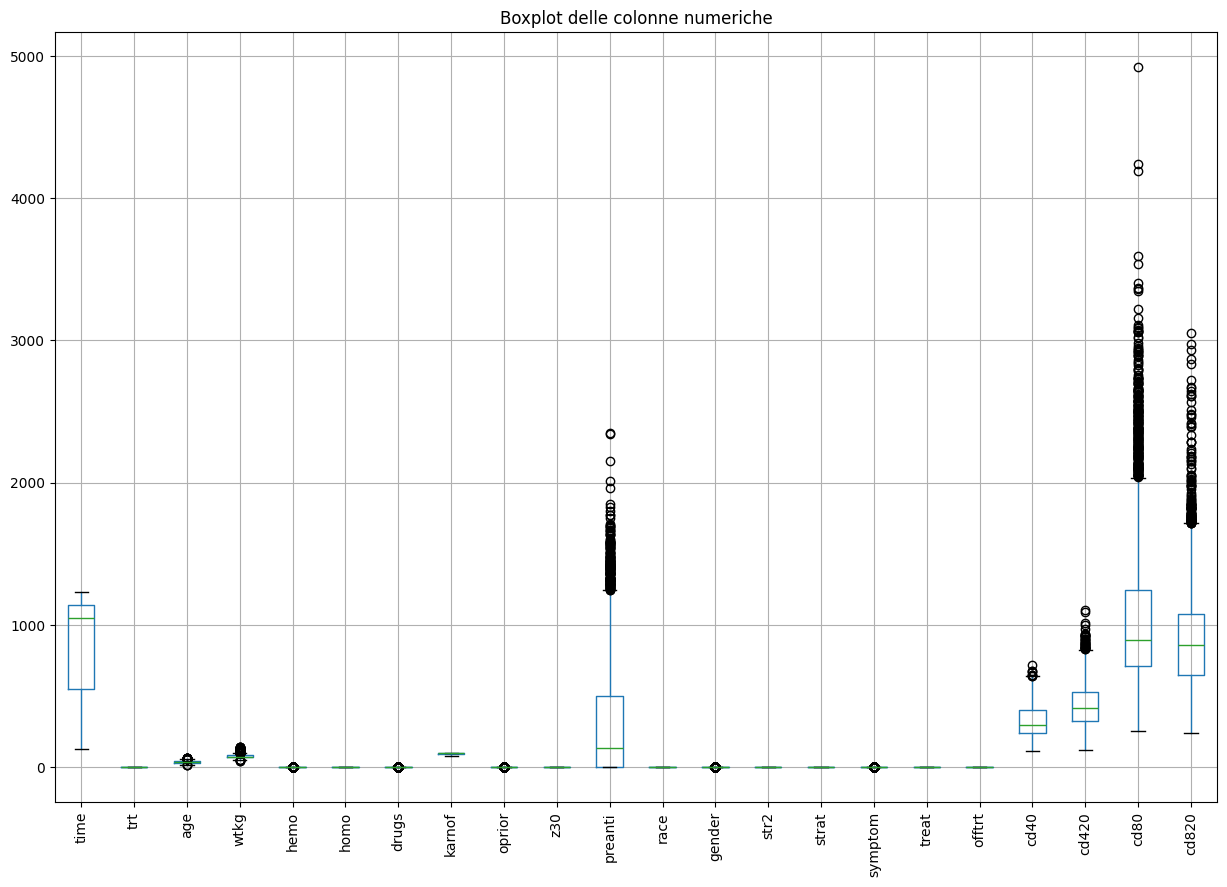

In [385]:
# Boxplot
plt.figure(figsize=(15, 10))
X[numeric_columns].boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot delle colonne numeriche')
plt.show()

In [386]:
X_num = X[numeric_columns]

# Rimozione colonne binarie
num_not_dummy_cols = X_num.columns[X_num.nunique() > 2]
X_num = X_num[num_not_dummy_cols]
normalized_df=(X_num-X_num.min())/(X_num.max()-X_num.min())
normalized_df.head()

,time,trt,age,wtkg,karnof,preanti,strat,cd40,cd420,cd80,cd820
0,0.780488,0.666667,0.60,0.277649,1.000000,0.387495,1.0,0.291181,0.293401,0.346467,0.509046
1,0.261066,1.000000,0.36,0.286943,1.000000,0.176095,0.0,0.650582,0.331980,0.239829,0.101809
2,0.898826,0.000000,0.50,0.297900,0.545455,0.344534,1.0,0.638935,0.429442,0.076445,0.439163
3,0.502258,1.000000,0.44,0.260143,1.000000,0.000000,0.0,0.329451,0.364467,0.113062,0.266407
4,0.830172,1.000000,0.46,0.188951,1.000000,0.001276,0.0,0.369384,0.651777,0.095503,0.531749


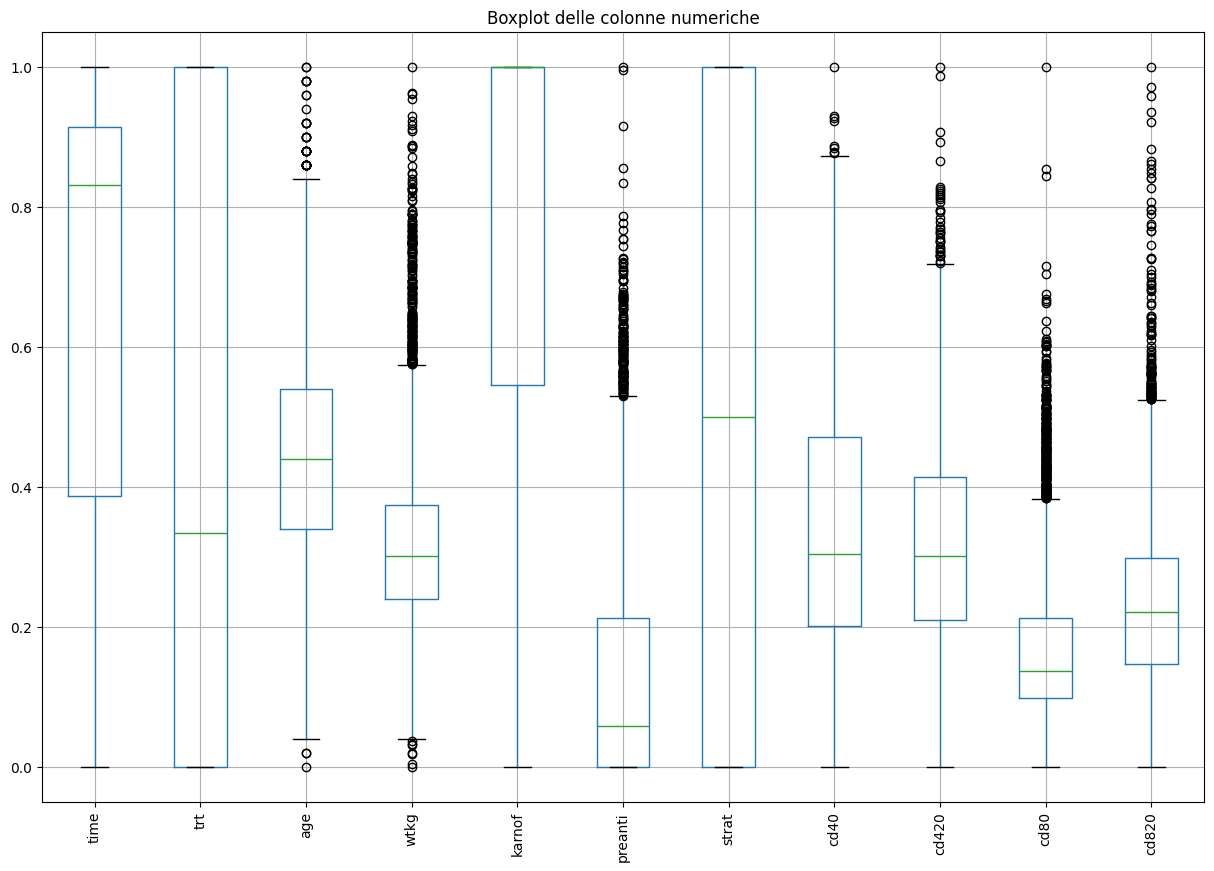

In [387]:
plt.figure(figsize=(15, 10))
normalized_df.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot delle colonne numeriche')
plt.show()

In [388]:
df_pos= df[df["infected"] == 1]
desired_dimension = round(df_pos.shape[0]/4*6)

df_neg = df[df["infected"] == 0]
df_neg = df_neg.sample(n = desired_dimension, random_state = 42)
df = pd.concat([df_pos, df_neg])
df.shape

(3947, 23)

In [389]:
df = standard_OHE(df)

In [390]:
#US-15
X = df.drop(columns='infected')
y = df.infected
X

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
7,1061,2,36,60.91513,0,0,0,90,0,0,...,0,0,3,0,0,0,232,295,1985,1407
9,553,1,46,62.11188,0,0,0,90,0,0,...,0,0,3,0,0,0,268,182,1317,959
21,1081,0,27,71.46741,0,0,0,100,0,1,...,0,1,1,1,1,0,315,358,509,444
26,317,0,38,83.49381,0,0,0,100,0,0,...,0,0,3,0,1,1,329,222,833,471
39,550,0,27,80.65015,0,1,0,100,0,0,...,0,0,2,0,0,0,154,921,1025,654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,372,3,36,73.66011,0,1,1,100,0,0,...,0,0,3,0,0,0,156,280,575,751
1665,927,2,31,67.06614,0,1,0,100,0,0,...,0,0,1,0,0,1,360,316,1045,473
3233,1019,2,33,84.41231,0,0,0,100,0,1,...,0,1,1,1,0,0,490,634,1076,660
601,1154,3,34,73.94789,0,1,0,90,0,1,...,0,1,1,0,0,1,292,335,1005,1659


In [391]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(3157, 22)
(790, 22)


In [392]:
clf = skl_lm.LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [393]:
#US-17
def rfe_selection(X, y, k):
    model = LogisticRegression(max_iter=10000, solver="newton-cholesky")
    rfe = RFE(model, n_features_to_select=k)
    rfe = rfe.fit(X, y)
    selected_features = X.columns[rfe.get_support(indices=True)]
    return X[selected_features]




In [394]:
def skb_selection(X, y, k):
    skb = SelectKBest(score_func=f_classif, k = k)
    skb = skb.fit(X, y)
    selected_features = X.columns[skb.get_support(indices=True)]
    return X[selected_features]

# Ciclo per rfe
Facciamo un ciclo per k. Andiamo quindi a far assumere alla variabile k valori da 1 (il minimo di feature che può avere un modello) fino al numero di variabili che abbiamo a disposizione "len(X.columns)". NB: il "+1" serve a farci selezionare anche il numero esatto delle colonne del dataset

In [395]:
accuracies_rfe = []

for k in tqdm(range(1,len(X.columns)+1)): 
    # selezioniamo le k variabili
    X_selected = rfe_selection(X=X_train, y=y_train, k=k)
    
    # aggiungiamo una costante come richiesto dal modulo statsmodels
    X_train_w_intercept = sm.add_constant(X_selected)
    
    # facciamo il fitting del modello 
    model = sm.Logit(y_train.to_numpy(), X_train_w_intercept).fit(disp=False)

    # prevediamo le probabilità
    y_pred = model.predict(X_train_w_intercept)
    
    # trasformiamo le probabilità in variabili binarie (0-1)
    y_pred = (y_pred > 0.5).astype(int)
    
    # calcoliamo l'accuracy del modello
    accuracy = metrics.accuracy_score(y_train, y_pred)
    
    # lo aggiungiamo alla lista 
    accuracies_rfe.append(accuracy)
  

100%|██████████| 22/22 [00:04<00:00,  5.24it/s]


In [396]:
k_rfe = 6

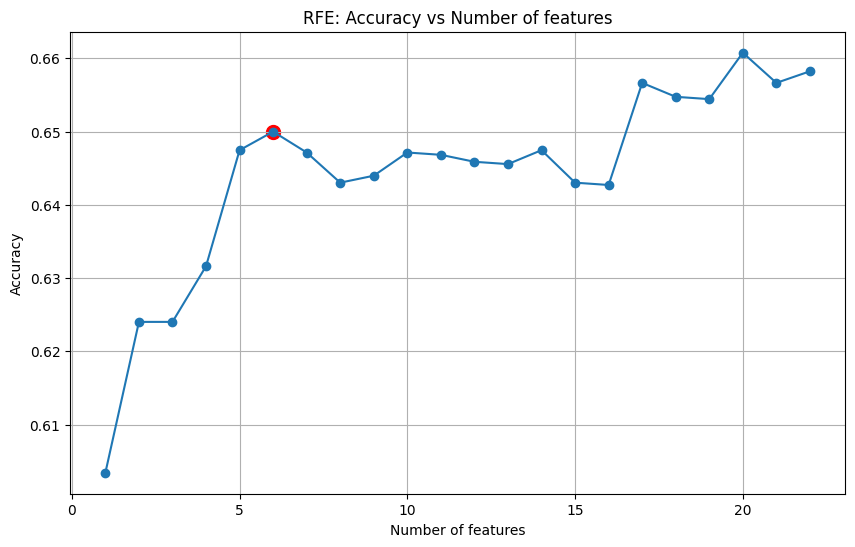

In [397]:

plt.figure(figsize=(10, 6))
plt.scatter(k_rfe, accuracies_rfe[k_rfe-1], color='red', label='Choosen number of features', s=100)
plt.plot(range(1, len(X_train.columns)+1), accuracies_rfe, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('RFE: Accuracy vs Number of features')
plt.grid()
plt.show()

In [398]:
k_skb = 4

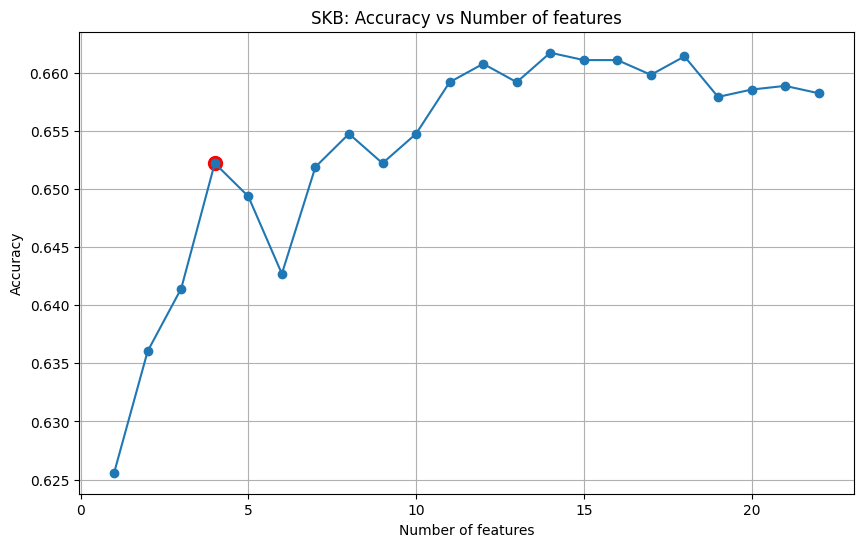

In [399]:
#Plot accuracies
plt.figure(figsize=(10, 6))
plt.scatter(k_skb, accuracies_skb[k_skb-1], color='red', label='Choosen number of features', s=100)
plt.plot(range(1, len(X_train.columns)+1), accuracies_skb, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('SKB: Accuracy vs Number of features')
plt.grid()
plt.show()

In [400]:
accuracies_skb = []

for k in tqdm(range(1,len(X.columns)+1)): 
    # selezioniamo le k variabili
    X_selected = skb_selection(X=X_train, y=y_train, k=k)
    
    # aggiungiamo una costante come richiesto dal modulo statsmodels
    X_train_w_intercept = sm.add_constant(X_selected)
    
    # facciamo il fitting del modello 
    model = sm.Logit(y_train.to_numpy(), X_train_w_intercept).fit(disp=False)

    # prevediamo le probabilità
    y_pred = model.predict(X_train_w_intercept)
    
    # trasformiamo le probabilità in variabili binarie (0-1)
    y_pred = (y_pred > 0.5).astype(int)
    
    # calcoliamo l'accuracy del modello
    accuracy = metrics.accuracy_score(y_train, y_pred)
    
    # lo aggiungiamo alla lista 
    accuracies_skb.append(accuracy)
    

100%|██████████| 22/22 [00:01<00:00, 20.38it/s]


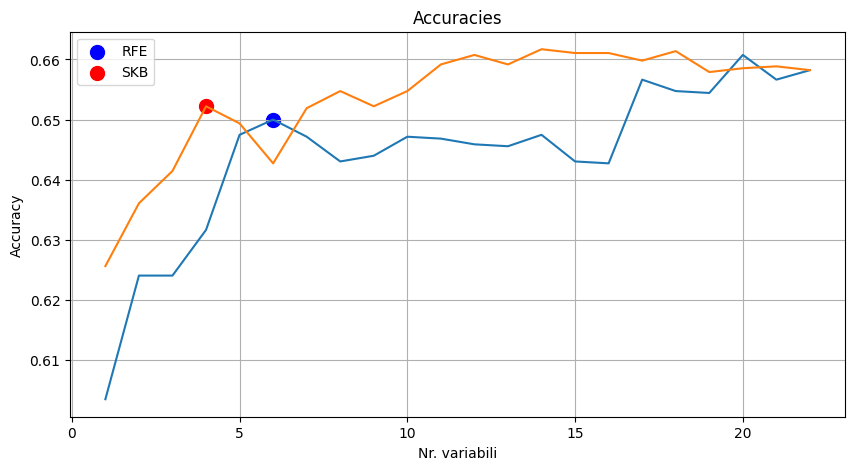

In [401]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(X_train.columns)+1), accuracies_rfe)
plt.plot(range(1, len(X_train.columns)+1), accuracies_skb)
plt.scatter(k_rfe, accuracies_rfe[k_rfe-1], color='blue', label='RFE', s=100)
plt.scatter(k_skb, accuracies_skb[k_skb-1], color='red', label='SKB', s=100)
plt.title('Accuracies') 
plt.xlabel('Nr. variabili')
plt.ylabel('Accuracy')
plt.grid()
plt.legend() 
plt.show()

In [402]:
X_selected_skb = skb_selection(X=X_train,y=y_train,k=k_skb)
skb_vars = X_selected_skb.columns
skb_vars

Index(['z30', 'str2', 'strat', 'cd420'], dtype='object')

In [403]:
X_selected_rfe = rfe_selection(X=X_train,y=y_train,k=k_rfe)
rfe_vars = X_selected_rfe.columns
rfe_vars

Index(['drugs', 'oprior', 'z30', 'str2', 'strat', 'treat'], dtype='object')

In [404]:
X_train_skb = X_train[skb_vars]
X_train_rfe = X_train[rfe_vars]

In [405]:
# LOOCV
def loocv(X, y):
    model = LogisticRegression(max_iter=10000, solver="newton-cholesky")
    loo = LeaveOneOut()
    scores = cross_val_score(model, X, y, cv=loo, scoring='accuracy')
    return scores.mean()

In [406]:
# LOOCV rfe
accuracy_rfe = loocv(X_train_rfe, y_train)
print(f"Accuracy with RFE: {accuracy_rfe}")

# LOOCV skb
accuracy_skb = loocv(X_train_skb, y_train)
print(f"Accuracy with SKB: {accuracy_skb}")

Accuracy with RFE: 0.6458663287931581
Accuracy with SKB: 0.6496674057649667


In [407]:
# Rimozione outlier a più di tre deviazioni standard dalla media
mean = df.mean()
mean


time         876.275906
trt            1.369648
age           34.237649
wtkg          75.776502
hemo           0.034203
homo           0.351659
drugs          0.136053
karnof        96.854826
oprior         0.040537
z30            0.338232
preanti      334.856347
race           0.290347
gender         0.153534
str2           0.399291
strat          1.995186
symptom        0.081074
treat          0.267798
offtrt         0.329111
cd40         316.552572
cd420        432.063339
cd80        1045.631112
cd820        904.234862
infected       0.599949
dtype: float64

In [408]:
std = df.std()
std

time        304.913783
trt           1.237577
age           6.959099
wtkg         12.327760
hemo          0.181774
homo          0.477549
drugs         0.342888
karnof        5.033436
oprior        0.197240
z30           0.473168
preanti     406.870290
race          0.453980
gender        0.360547
str2          0.489815
strat         0.891889
symptom       0.272984
treat         0.442868
offtrt        0.469950
cd40        102.138445
cd420       141.265967
cd80        487.946165
cd820       338.859969
infected      0.489970
dtype: float64

In [409]:
X = df.drop(columns='infected')
y = df.infected
outliers_removed = X[(np.abs((df - mean) / std) <= 3).all(axis=1)]
outliers_removed


,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
7,1061,2,36,60.91513,0,0,0,90,0,0,...,0,0,3,0,0,0,232,295,1985,1407
9,553,1,46,62.11188,0,0,0,90,0,0,...,0,0,3,0,0,0,268,182,1317,959
26,317,0,38,83.49381,0,0,0,100,0,0,...,0,0,3,0,1,1,329,222,833,471
40,536,0,43,92.51401,0,0,0,90,0,0,...,0,0,2,0,0,0,305,322,1141,1444
41,497,0,31,72.78070,0,0,0,100,0,1,...,0,1,1,0,0,0,140,708,465,1485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,1070,1,33,71.78784,0,0,0,90,0,1,...,0,0,1,0,0,0,388,512,829,1195
1418,372,3,36,73.66011,0,1,1,100,0,0,...,0,0,3,0,0,0,156,280,575,751
1665,927,2,31,67.06614,0,1,0,100,0,0,...,0,0,1,0,0,1,360,316,1045,473
601,1154,3,34,73.94789,0,1,0,90,0,1,...,0,1,1,0,0,1,292,335,1005,1659


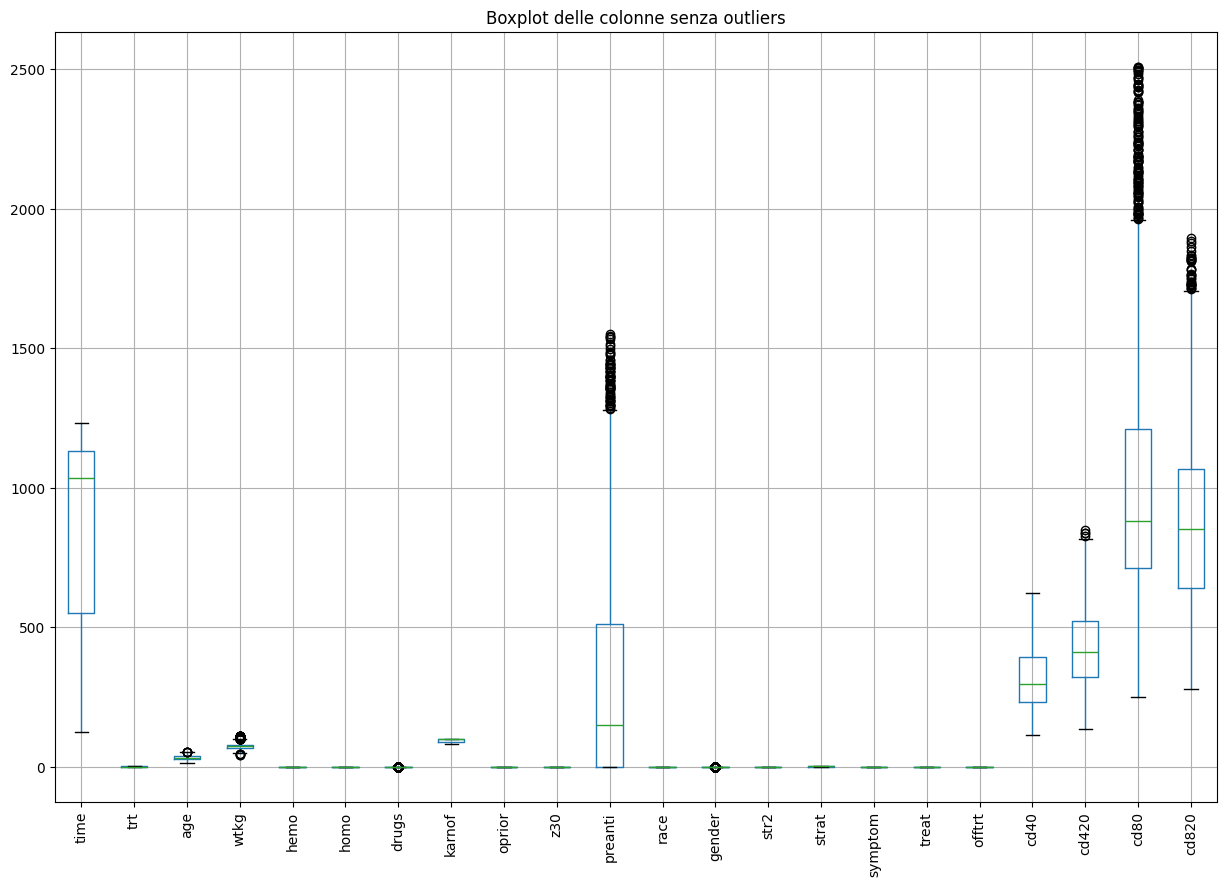

In [410]:
plt.figure(figsize=(15, 10))
outliers_removed.boxplot()
plt.xticks(rotation=90)
plt.title('Boxplot delle colonne senza outliers')
plt.show()

In [411]:
# Interquartile range
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers = {column: find_outliers(X, column) for column in numeric_columns}
outliers

{'time': Empty DataFrame
 Columns: [time, trt, age, wtkg, hemo, homo, drugs, karnof, oprior, z30, preanti, race, gender, str2, strat, symptom, treat, offtrt, cd40, cd420, cd80, cd820]
 Index: []
 
 [0 rows x 22 columns],
 'trt': Empty DataFrame
 Columns: [time, trt, age, wtkg, hemo, homo, drugs, karnof, oprior, z30, preanti, race, gender, str2, strat, symptom, treat, offtrt, cd40, cd420, cd80, cd820]
 Index: []
 
 [0 rows x 22 columns],
 'age':       time  trt  age       wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  \
 201   1115    2   61   55.66696     0     0      0     100       1    0  ...   
 853   1186    3   56   79.43643     0     0      1     100       0    1  ...   
 1816   380    0   62   82.75014     0     0      0      90       0    0  ...   
 2828  1094    0   57   84.16825     0     1      1     100       1    0  ...   
 2939  1066    2   55   71.86858     0     0      0     100       0    0  ...   
 3024   375    0   56  120.20402     0     0      0      90       